In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy as sc
from kafe2 import *
from uncertainties import ufloat
from uncertainties import unumpy as unp

# Einlesen aller Daten

In [3]:
scale = 3 * 10**-6 / 40
# 5mW Video
fixed_mass_df = pd.read_csv("Data/Tracked_Mass/vid2_fixed_mass.txt", decimal=",", delimiter=";", skiprows=1)
mass_A_df = pd.read_csv("Data/Tracked_Mass/vid2_massA.txt", decimal=",", delimiter=";", skiprows=1)
mass_B_df = pd.read_csv("Data/Tracked_Mass/vid2_massB.txt", decimal=",", delimiter=";", skiprows=1)
mass_C_df = pd.read_csv("Data/Tracked_Mass/vid2_massC.txt", decimal=",", delimiter=";", skiprows=1)
mass_D_df = pd.read_csv("Data/Tracked_Mass/vid2_massD.txt", decimal=",", delimiter=";", skiprows=1)
mass_E_df = pd.read_csv("Data/Tracked_Mass/vid2_massE.txt", decimal=",", delimiter=";", skiprows=1)
# 3mW Video
fixed_mass2_df = pd.read_csv("Data/Tracked_Mass/3mW_fixed_mass.txt", decimal=",", delimiter=";", skiprows=1)
mass_A2_df = pd.read_csv("Data/Tracked_Mass/3mW_massA.txt", decimal=",", delimiter=";", skiprows=1)
mass_B2_df = pd.read_csv("Data/Tracked_Mass/3mW_massB.txt", decimal=",", delimiter=";", skiprows=1)
mass_C2_df = pd.read_csv("Data/Tracked_Mass/3mW_massC.txt", decimal=",", delimiter=";", skiprows=1)
mass_D2_df = pd.read_csv("Data/Tracked_Mass/3mW_massD.txt", decimal=",", delimiter=";", skiprows=1)
mass_E2_df = pd.read_csv("Data/Tracked_Mass/3mW_massE.txt", decimal=",", delimiter=";", skiprows=1)

# t, x, y
# scale ist Skalierungsfaktor von px auf um
# 5mW Video
fixed_mass = np.array([fixed_mass_df["t"] , fixed_mass_df["x"] * scale , fixed_mass_df["y"] * scale])
mass_A = np.array([mass_A_df["t"] , mass_A_df["x"] * scale , mass_A_df["y"] * scale])
mass_B = np.array([mass_B_df["t"] , mass_B_df["x"] * scale , mass_B_df["y"] * scale])
mass_C = np.array([mass_C_df["t"] , mass_C_df["x"] * scale , mass_C_df["y"] * scale])
mass_D = np.array([mass_D_df["t"] , mass_D_df["x"] * scale , mass_D_df["y"] * scale])
mass_E = np.array([mass_E_df["t"] , mass_E_df["x"] * scale , mass_E_df["y"] * scale])
# 3mW Video
fixed_mass2 = np.array([fixed_mass2_df["t"] , fixed_mass2_df["x"] * scale , fixed_mass2_df["y"] * scale])
mass_A2 = np.array([mass_A2_df["t"] , mass_A2_df["x"] * scale , mass_A2_df["y"] * scale])
mass_B2 = np.array([mass_B2_df["t"] , mass_B2_df["x"] * scale , mass_B2_df["y"] * scale])
mass_C2 = np.array([mass_C2_df["t"] , mass_C2_df["x"] * scale , mass_C2_df["y"] * scale])
mass_D2 = np.array([mass_D2_df["t"] , mass_D2_df["x"] * scale , mass_D2_df["y"] * scale])
mass_E2 = np.array([mass_E2_df["t"] , mass_E2_df["x"] * scale , mass_E2_df["y"] * scale])

# Aufgabe 4: Brownian Motion

- Abmessungen der Arbeitsfläche: 1280x1024 (x-y)  
- Koordinatenursprung: Mitte des Bildes (640 rechts/links, 512 hoch/runter)  
    - 3um entsprechen 40px +/- 5px  
    - <=> 3/40um entsprechen 1px  
    => Koordinaten müssen von px in um umgerechnet werden

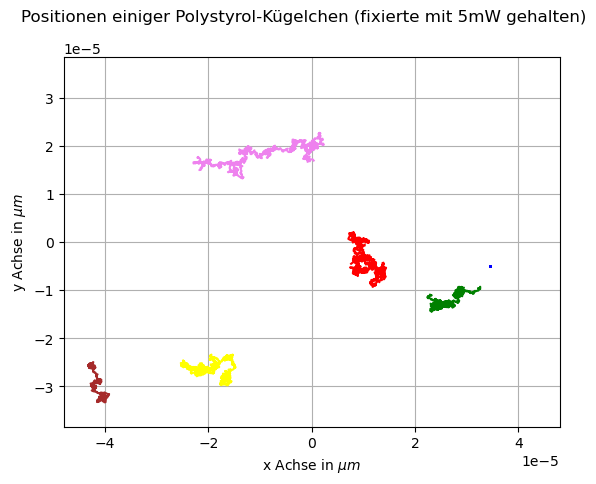

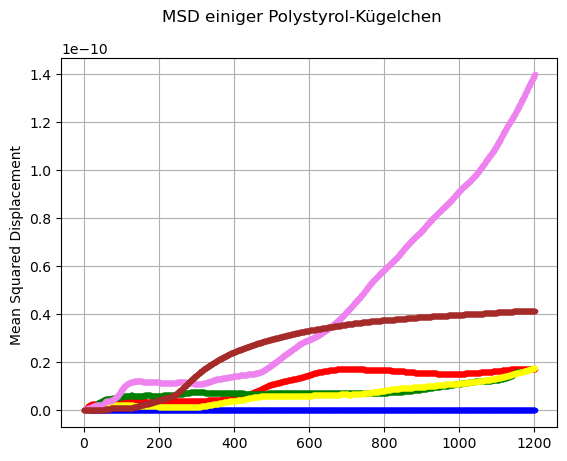

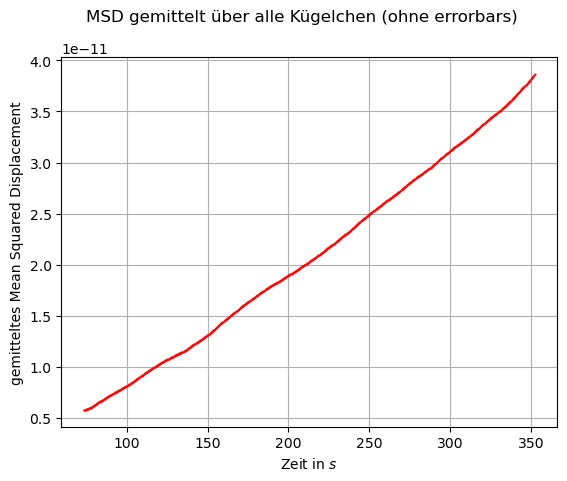

In [4]:
# Plotte Bewegung der Kügelchen
fig1, ax1 = plt.subplots()
ax1.plot(fixed_mass[1], fixed_mass[2], label="Fixierte Masse", color="blue")
ax1.plot(mass_A[1], mass_A[2], label="Masse A1", color="red")
ax1.plot(mass_B[1][:-14], mass_B[2][:-14], label="Masse B1", color="green")
ax1.plot(mass_C[1], mass_C[2], label="Masse C1", color="yellow")
ax1.plot(mass_D[1], mass_D[2], label="Masse D1", color="violet")
ax1.plot(mass_E[1], mass_E[2], label="Masse E1", color="brown")
# ax1.plot(mass_A2[1], mass_A2[2], label="Masse A2", color="magenta")
# ax1.plot(mass_B2[1], mass_B2[2], label="Masse B2", color="lightgreen")
# ax1.plot(mass_C2[1], mass_C2[2], label="Masse C2", color="lightblue")
# ax1.plot(mass_D2[1], mass_D2[2], label="Masse D2", color="pink")
# ax1.plot(mass_E2[1], mass_E2[2], label="Masse E2", color="orange")
ax1.set_xlim(left=-640 * scale , right=640 * scale)
ax1.set_ylim(bottom=-512 * scale , top=512 * scale)
ax1.set(xlabel="x Achse in $\mu m$", ylabel="y Achse in $\mu m$")
fig1.suptitle("Positionen einiger Polystyrol-Kügelchen (fixierte mit 5mW gehalten)")
ax1.grid()#, ax1.legend()

# Berechne "Squared Displacement" für jedes Kügelchen für jede Position

sd_fixed = (fixed_mass[1]-fixed_mass[1][0])**2 + (fixed_mass[2]-fixed_mass[2][0])**2
sd_A = (mass_A[1]-mass_A[1][0])**2 + (mass_A[2]-mass_A[2][0])**2
sd_B = (mass_B[1]-mass_B[1][0])**2 + (mass_B[2]-mass_B[2][0])**2
sd_C = (mass_C[1]-mass_C[1][0])**2 + (mass_C[2]-mass_C[2][0])**2
sd_D = (mass_D[1]-mass_D[1][0])**2 + (mass_D[2]-mass_D[2][0])**2
sd_E = (mass_E[1]-mass_E[1][0])**2 + (mass_E[2]-mass_E[2][0])**2
# sd_A2 = (mass_A2[1]-mass_A2[1][0])**2 + (mass_A2[2]-mass_A2[2][0])**2
# sd_B2 = (mass_B2[1]-mass_B2[1][0])**2 + (mass_B2[2]-mass_B2[2][0])**2
# sd_C2 = (mass_C2[1]-mass_C2[1][0])**2 + (mass_C2[2]-mass_C2[2][0])**2
# sd_D2 = (mass_D2[1]-mass_D2[1][0])**2 + (mass_D2[2]-mass_D2[2][0])**2
# sd_E2 = (mass_E2[1]-mass_E2[1][0])**2 + (mass_E2[2]-mass_E2[2][0])**2

"""
Erstelle Array für MSD der selben Länge wie das SD Array
Jeder Eintrag ist die Summe der vorherigen Einträge (bis einschl. des i-ten Eintrags) im SD Array
Erster Eintrag im MSD Array ist genau erster Eintrag im SD Array
"""
msd_fixed = np.zeros(np.size(sd_fixed))
msd_A = np.zeros(np.size(sd_A))
msd_B = np.zeros(np.size(sd_B))
msd_C = np.zeros(np.size(sd_C))
msd_D = np.zeros(np.size(sd_D))
msd_E = np.zeros(np.size(sd_E))
# msd_A2 = np.zeros(np.size(sd_A2))
# msd_B2 = np.zeros(np.size(sd_B2))
# msd_C2 = np.zeros(np.size(sd_C2))
# msd_D2 = np.zeros(np.size(sd_D2))
# msd_E2 = np.zeros(np.size(sd_E2))

# Berechne Mean Squared Displacement für jede Kugel
for i in range(np.size(sd_fixed)): msd_fixed[i] = np.sum(sd_fixed[:i+1]) / np.size(sd_fixed[:i+1])
for i in range(np.size(sd_A)): msd_A[i] = np.sum(sd_A[:i+1]) / np.size(sd_A[:i+1])
for i in range(np.size(sd_B)): msd_B[i] = np.sum(sd_B[:i+1]) / np.size(sd_B[:i+1])
for i in range(np.size(sd_C)): msd_C[i] = np.sum(sd_C[:i+1]) / np.size(sd_C[:i+1])
for i in range(np.size(sd_D)): msd_D[i] = np.sum(sd_D[:i+1]) / np.size(sd_D[:i+1])
for i in range(np.size(sd_E)): msd_E[i] = np.sum(sd_E[:i+1]) / np.size(sd_E[:i+1])
# for i in range(np.size(sd_A2)): msd_A2[i] = np.sum(sd_A2[:i+1]) / np.size(sd_A2[:i+1])
# for i in range(np.size(sd_B2)): msd_B2[i] = np.sum(sd_B2[:i+1]) / np.size(sd_B2[:i+1])
# for i in range(np.size(sd_C2)): msd_C2[i] = np.sum(sd_C2[:i+1]) / np.size(sd_C2[:i+1])
# for i in range(np.size(sd_D2)): msd_D2[i] = np.sum(sd_D2[:i+1]) / np.size(sd_D2[:i+1])
# for i in range(np.size(sd_E2)): msd_E2[i] = np.sum(sd_E2[:i+1]) / np.size(sd_E2[:i+1])

# Plotte Mean Squared Displacement für jede Kugel
fig2, ax2 = plt.subplots()
ax2.plot(msd_fixed, color="blue", marker=".", label="Fixierte Masse")
ax2.plot(msd_A, color="red", marker=".", label="Masse A1")
ax2.plot(msd_B, color="green", marker=".", label="Masse B1")
ax2.plot(msd_C, color="yellow", marker=".", label="Masse C1")
ax2.plot(msd_D, color="violet", marker=".", label="Masse D1")
ax2.plot(msd_E, color="brown", marker=".", label="Masse E1")
# ax2.plot(msd_A2, color="magenta", marker=".", label="Masse A2")
# ax2.plot(msd_B2, color="lightgreen", marker=".", label="Masse B2")
# ax2.plot(msd_C2, color="lightblue", marker=".", label="Masse C2")
# ax2.plot(msd_D2, color="pink", marker=".", label="Masse D2")
# ax2.plot(msd_E2, color="orange", marker=".", label="Masse E2")
ax2.set( ylabel="Mean Squared Displacement ")
fig2.suptitle("MSD einiger Polystyrol-Kügelchen")
ax2.grid()#, ax2.legend()
plt.show()

# Berechne für jeden Zeitpunkt den Mittelwert aller MSDS
# Liste aller MSD Arrays aus dem ersten Video (exkl. fixierter Masse)
msd_list1 = [msd_A , msd_B , msd_C , msd_D , msd_E]
# Finde die Länge des längsten MSD Arrays
max_length1 = max(len(arr) for arr in msd_list1)
# Bringe alle MSD Arrays auf selbe maximale Länge, indem genügen np.nan Elemente hinzugefügt werden
padded_msd_arrs1 = np.array([np.pad(arr, (0, max_length1 - len(arr)), constant_values=np.nan) for arr in msd_list1])
# Berechne Mittelwert über alle i-ten Elemente, wobei np.nan ingnoriert werden
msd_avg1 = unp.uarray(np.nanmean(padded_msd_arrs1, axis=0), .47*10**-12)

# Plotte gemitteltes MSD ohne errorbars, mit errorbars dann im Fit
fig3, ax3 = plt.subplots()
## vorher alle: [:1150]
ax3.plot(mass_A[0][230:1100], unp.nominal_values(msd_avg1[230:1100]), "r.", markersize=1)
ax3.set( xlabel="Zeit in $s$" , ylabel="gemitteltes Mean Squared Displacement")
fig3.suptitle("MSD gemittelt über alle Kügelchen (ohne errorbars)")
ax3.grid(), plt.show()

def lin(x, m=1, c=0):
    return m*x + c

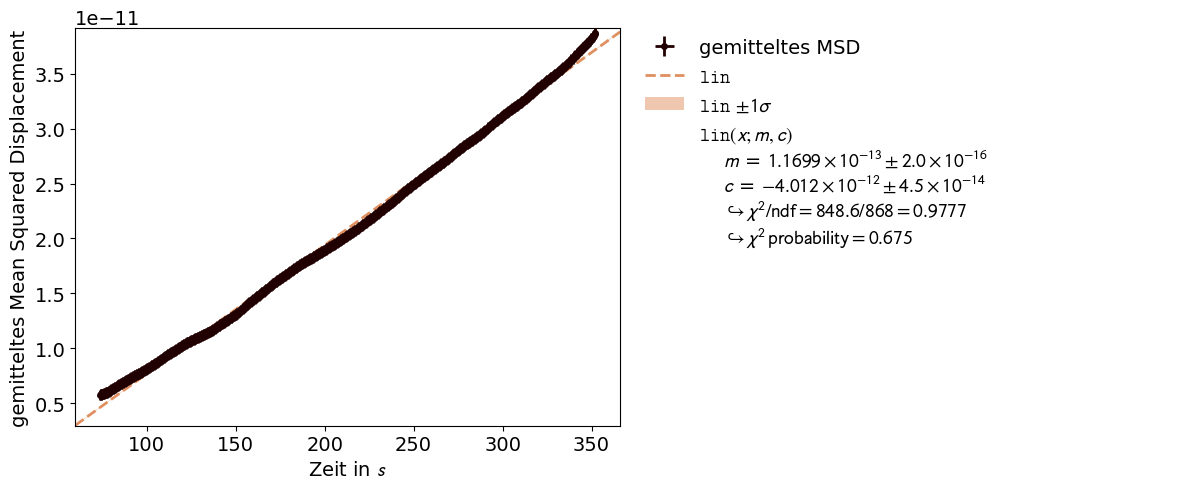

([{'main': {'plots': [{'type': 'data',
      'fit_index': 0,
      'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x27ef62ac990>,
      'artist': <ErrorbarContainer object of 3 artists>},
     {'type': 'model',
      'fit_index': 0,
      'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x27ef62ac990>,
      'artist': None},
     {'type': 'model_line',
      'fit_index': 0,
      'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x27ef62ac990>,
      'artist': [<matplotlib.lines.Line2D at 0x27efe9587d0>]},
     {'type': 'model_error_band',
      'fit_index': 0,
      'adapter': <kafe2.fit.xy.plot.XYPlotAdapter at 0x27ef62ac990>,
      'artist': <matplotlib.collections.PolyCollection at 0x27e85353e10>}],
    'x_range': (59.77215000000001, 366.05285)}}],
 None)

In [5]:
# Fitte Gerade an gemitteltes MSD
msdavg_xy_data = XYContainer(mass_A[0][230:1100], unp.nominal_values(msd_avg1[230:1100]))
msdavg_xy_data.label = "gemitteltes MSD"
msdavg_fit = XYFit(xy_data = msdavg_xy_data, model_function = lin)
msdavg_fit.add_error(axis = 'y', err_val = unp.std_devs(msd_avg1[230:1100]))
msdavg_fit.do_fit()
plot = Plot(msdavg_fit)
plot.x_label, plot.y_label = "Zeit in $s$" , "gemitteltes Mean Squared Displacement"
plot.plot(), plot.show()

# plt.errorbar(mass_A[0][:1158], unp.nominal_values(msd_avg1[:1158]), yerr=unp.std_devs(msd_avg1[:1158]), fmt="r.", elinewidth=.5, markersize=.5)

# Aufgabe 5: Maximum Trapping Force
- Maximalgeschwindigkeit ( 10.5 +/- .2 ) um/s  
- Temperatur: ( 20 +/- 1 ) °C für Boltzmann Verteilung gedöns  

In [10]:
vmax = ufloat(10.5, 0.2) * 10**-6
T = ufloat(293 , 1)
m = ufloat(msdavg_fit.parameter_values[0], msdavg_fit.parameter_errors[0])
kb = 1.38 * 10**-23
a = ufloat(3/2, 0.3) * 10**-6
F_tmax = 4 * vmax * kb * T / m
visc = 2 * kb * T / (3 * np.pi * a * m)
print(F_tmax, visc)


(1.452+/-0.028)e-12 0.0049+/-0.0010
